## WeatherPy

**Note**

- Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from JamesWilliams_api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls

- Perform a weather check on each city using a series of successive API calls.
- Include a print log of each city as it'sbeing processed (with the city number and city name).

In [4]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# List of city data
query = url + character
    response = requests.get(query)
    response_json = response.json()
# Print to logger
print(cities)
# Create counters

# Loop through all the cities in our list

    # Group cities in sets of 50 for logging purposes

    # Create endpoint URL with each city
    
    # Log the url, record, and set numbers

    # Add 1 to the record count

    # Run an API request for each of the cities
    
        # Parse the JSON and retrieve data

        # Parse out the max temp, humidity, and cloudiness

        # Append the City information into city_data list

    # If an error is experienced, skip the city
              
# Indicate that Data Loading is complete 


['te anau', 'mentok', 'bredasdorp', 'bluff', 'hovd', 'atuona', 'attawapiskat', 'ushuaia', 'sankheda', 'lakatoro', 'new norfolk', 'mataura', 'vaini', 'pontivy', 'chapais', 'ribeira grande', 'hermanus', 'sao filipe', 'marcona', 'kualakapuas', 'hithadhoo', 'huambo', 'busselton', 'yangambi', 'pevek', 'zhuhai', 'cape town', 'baykit', 'hofn', 'arrifes', 'kelowna', 'paamiut', 'tiksi', 'sitka', 'baldone', 'mahenge', 'kaitangata', 'rio grande', 'hamilton', 'arraial do cabo', 'yershov', 'mar del plata', 'klichka', 'ostrovnoy', 'puerto ayora', 'norman wells', 'albany', 'terney', 'la ronge', 'hay river', 'tasbuget', 'jamestown', 'murgab', 'barentsburg', 'yar-sale', 'vaitape', 'hilo', 'thinadhoo', 'vanimo', 'georgetown', 'qaanaaq', 'beloha', 'hobart', 'grand centre', 'cherskiy', 'korla', 'barrow', 'punta arenas', 'nizhneyansk', 'carnarvon', 'avarua', 'samusu', 'vila franca do campo', 'port blair', 'rikitea', 'san jeronimo', 'muravlenko', 'castro', 'tuktoyaktuk', 'chengdu', 'butaritari', 'chokurdakh

### Convert Raw Data to DataFrame
- Export the city data into a .csv.
- Display the DataFrame

In [4]:
# Convert array of JSONs into Pandas DataFrame

# Show Record Count


City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [5]:
# Display the City Data Frame


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sitio novo do tocantins,-5.52,-47.46,95.22,32,87,8.41,BR,1602703557
1,virginia beach,36.85,-75.98,73.99,38,20,5.82,US,1602703527
2,santa cruz cabralia,-16.28,-39.02,80.60,61,95,16.11,BR,1602703558
3,wairoa,-39.03,177.37,48.99,88,100,5.99,NZ,1602703558
4,coquimbo,-29.95,-71.34,62.60,63,7,11.41,CL,1602703558


### Inspect the data and remove the cities where the humidity > 100%.

- Skip this step if there are no cities that have humidity > 100%.

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,5.840000e+02
mean,19.367021,17.034229,64.013459,69.775685,47.897260,7.886610,1.602704e+09
std,32.243674,88.388627,19.837036,22.094667,40.137111,5.258004,7.106182e+01
min,-54.800000,-179.170000,10.600000,8.000000,0.000000,0.310000,1.602703e+09
25%,-5.482500,-57.462500,50.000000,55.000000,1.750000,3.360000,1.602704e+09
50%,20.605000,18.385000,68.315000,77.000000,40.000000,6.920000,1.602704e+09
75%,46.195000,97.530000,79.027500,87.000000,90.000000,11.180000,1.602704e+09
max,78.220000,177.480000,104.000000,100.000000,100.000000,27.780000,1.602704e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sitio novo do tocantins,-5.52,-47.46,95.22,32,87,8.41,BR,1602703557
1,virginia beach,36.85,-75.98,73.99,38,20,5.82,US,1602703527
2,santa cruz cabralia,-16.28,-39.02,80.60,61,95,16.11,BR,1602703558
3,wairoa,-39.03,177.37,48.99,88,100,5.99,NZ,1602703558
4,coquimbo,-29.95,-71.34,62.60,63,7,11.41,CL,1602703558


In [12]:
# Extract relevant fields from the data frame

# Export the City_Data into a csv


### Latitude vs. Temperature Plot

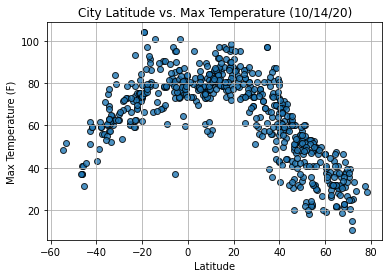

In [14]:
# Build scatter plot for latitude vs. temperature

# Incorporate the other graph properties


# Save the figure


# Show plot


### Latitude vs. Humidity Plot

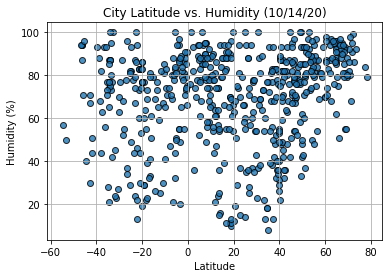

In [15]:
# Build the scatter plots for latitude vs. humidity


# Incorporate the other graph properties


# Save the figure

# Show plot


### Latitude vs. Cloudiness Plot

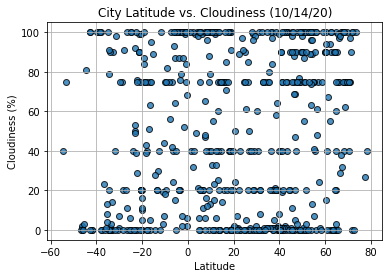

In [16]:
# Build the scatter plots for latitude vs. cloudiness


# Incorporate the other graph properties


# Save the figure


# Show plot


### Latitude vs. Wind Speed Plot

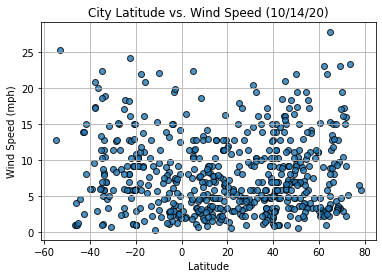

In [18]:
# Build the scatter plots for latitude vs. wind speed


# Incorporate the other graph properties


# Save the figure

# Show plot


### Linear Regression

In [20]:
# Create a function to create Linear Regression plots


In [21]:
# Create Northern and Southern Hemisphere DataFrames


### Max Temp vs. Latitude Linear Regression

The r-value is: 0.7202668224182556


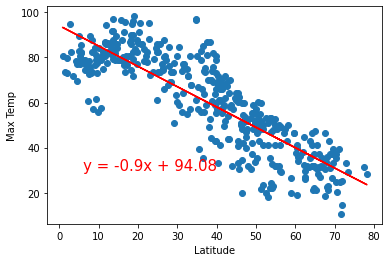

In [22]:
# Linear regression on Northern Hemisphere


The r-value is: 0.46441481952163494


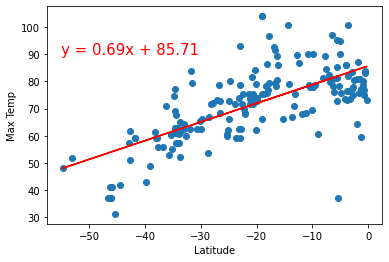

In [25]:
# Linear regression on Southern Hemisphere


### Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.054984702387992135


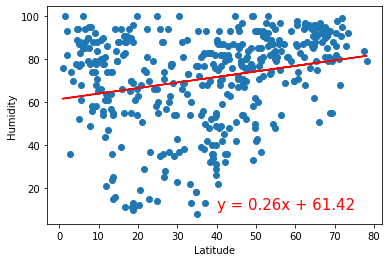

In [26]:
# Northern Hemisphere


The r-value is: 0.0010657268979034798


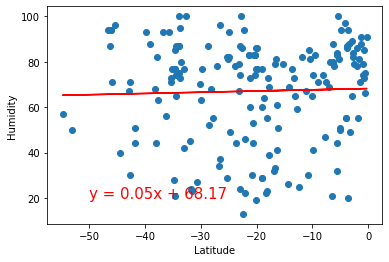

In [27]:
# Southern Hemisphere


### Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.014537789747088272


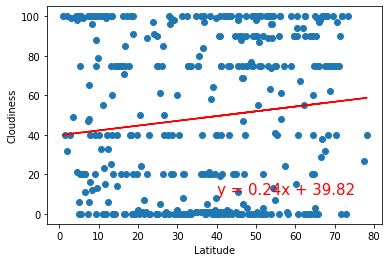

In [28]:
# Northern Hemisphere


The r-value is: 0.10332914265051853


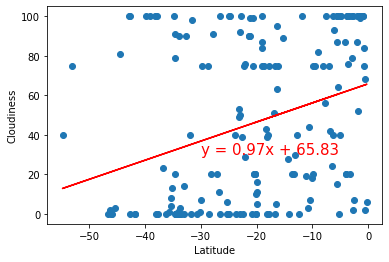

In [29]:
# Southern Hemisphere


### Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.031284983638349965


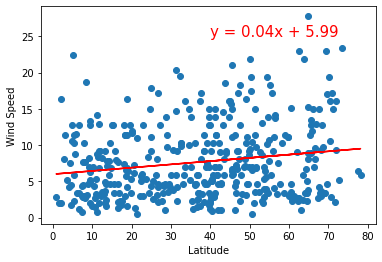

In [31]:
# Northern Hemisphere


The r-value is: 0.023550214994640835


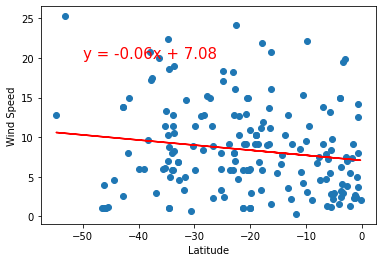

In [32]:
# Southern Hemisphere
